# Homework 1

## Overview
This homework will walk you through the process of geospatial data analysis under the short-term rental market (Airbnb) context in New York City. Through this practice, you will get more familiar with pandas, numpy, geopandas, seaborn, and matplotlib modules to retrieve, clean, and visulaize geospatial data. 

## Grading
Each exercise will be graded based on the following rubrics:
- 2 points. Completed the task, presented the expected results, and codes were well documented and explained.
- 1 point. Completed the task with some disparity from the expected results.
- 0 point. Did not complete the excercise.

## Late submission policy
For late submission, every extra day after the due date will lead to 20% off of your points. Less than a day will be counted as one day. All submissions after the TA team posts the answers will not be accepted.

In [1]:
#import sys
#!{sys.executable} -m pip install pytz

# !{sys.executable} -m pip install geopandas

# !{sys.executable} -m pip install pyparsing

# !{sys.executable} -m pip install folium

# import sys
# !{sys.executable} -m pip install cenpy

# import sys
# !{sys.executable} -m pip install mapclassify

# import cenpy
# cenpy.set_sitekey('5c1e0c81d88ad71e0058b07bb724e8e0710d90f4', overwrite = True)
# cenpy.products.ACS.from_msa(level = 'tract', return_geometry = True)

## 1. Retrieve Data
### 1.1 Read the Airbnb Data (2 points)
The first step is to retrieve two datasets from oline resrouces and read one given dataset. Two online resources include the Airbnb lisitng information and the census tract of New York City.

Go to the Airbnb data warehouse http://insideairbnb.com/get-the-data/ and find New York City section:
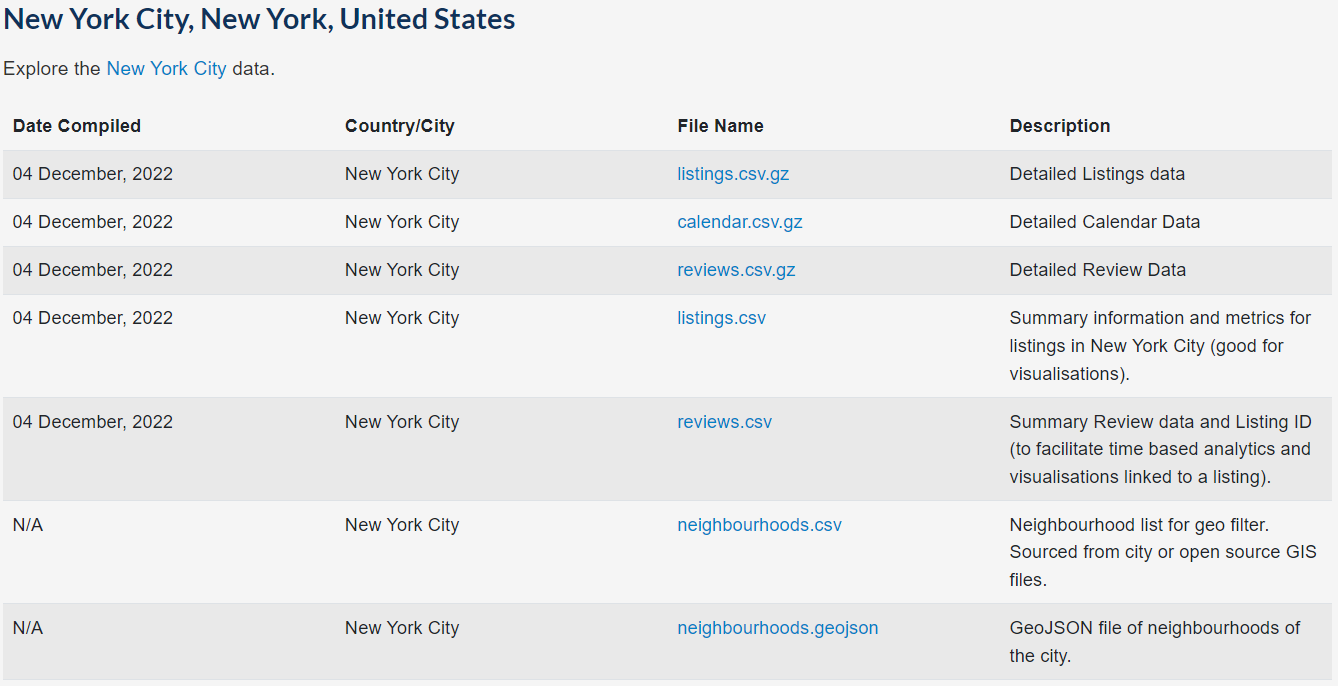

Right click on the hyperlink of the first row and copy the link. Name the dataframe as *listing_raw*. Present the first 5 rows below.

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')
listing_raw.head()

C:\Users\jewel\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jewel\miniconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\jewel\miniconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\jewel\AppData\Local\Temp\ipykernel_10984\3243959873.py:5: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listing_raw = pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2022-12-04/data/listings.csv.gz')


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,NaN,f,3,3,0,0,0.31
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.73
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,NaN,f,1,1,0,0,0.03
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.30
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,NaN,f,1,1,0,0,1.13


### 1.2 Retrieve the Census Tracts of New York City (2 points)
Go to NYC Department of planning (https://www.nyc.gov/site/planning/data-maps/open-data/census-download-metadata.page). Unfold the *Census Blocks and Tracts* tab and copy the *GeoJSON* link of *2020 Census Tracts (Clipped to shoreline)*.
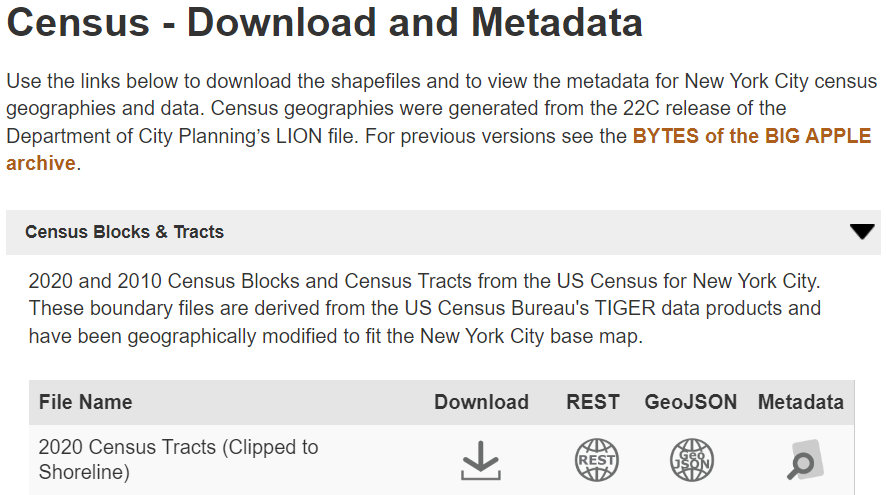

After reading GeoJSON file from the url, assign the dataframe with WGS 84 Geodetic System (epsg = 4326) and name the dataframe as **ct**. Show the first 5 rows of the **ct**.

In [3]:
url = 'https://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/NYC_Census_Tracts_for_2020_US_Census/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=pgeojson'
ct = gpd.read_file(url).to_crs(epsg = 4326)
ct.head()

,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881754,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723122e+05,4754.495244,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,3,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,2.582705e+06,6976.286456,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."
3,4,14.01,1,Manhattan,001401,1001401,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,1.006117e+06,5075.332000,"POLYGON ((-73.98837 40.71645, -73.98754 40.716..."
4,5,14.02,1,Manhattan,001402,1001402,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,1.226206e+06,4459.156019,"POLYGON ((-73.98507 40.71909, -73.98423 40.718..."


### 1.3 Read the Local Dataset (2 points)
Read the demographic information from the given csv file and name it as **demo**. Show the information of **demo** with the function .info().

In [4]:
demo = pd.read_csv('./acs_nyc.csv')
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEOID        2327 non-null   int64  
 1   hh_income    2196 non-null   float64
 2   house_value  1966 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 54.7 KB


## 2. Data Wrangling/Cleaning
### 2.1 Rename the Columns of **ct** (2 points)
Rename the column of *BoroName* as *borough_ct* and column of *NTAName* as *tract_ct*. Show the first 5 rows of **ct**.

In [5]:
ct.rename(columns = {'BoroName':'borough_ct', 'NTAName':'tract_ct'}, inplace = True)
ct.head()

,OBJECTID,CTLabel,BoroCode,borough_ct,CT2020,BoroCT2020,CDEligibil,tract_ct,NTA2020,CDTA2020,CDTANAME,GEOID,Shape__Area,Shape__Length,geometry
0,1,1,1,Manhattan,000100,1000100,None,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,1.844391e+06,11022.881754,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ..."
1,2,2.01,1,Manhattan,000201,1000201,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,9.723122e+05,4754.495244,"POLYGON ((-73.98450 40.70952, -73.98655 40.709..."
2,3,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,2.582705e+06,6976.286456,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."
3,4,14.01,1,Manhattan,001401,1001401,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,1.006117e+06,5075.332000,"POLYGON ((-73.98837 40.71645, -73.98754 40.716..."
4,5,14.02,1,Manhattan,001402,1001402,None,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,1.226206e+06,4459.156019,"POLYGON ((-73.98507 40.71909, -73.98423 40.718..."


### 2.2 Generate GeometryArray from Latitude and Longitude (2 points)
To conduct geospatial analysis, the geospatial information must be specified. For example, **listing_raw** dataframe contains *latitude* and *longitude* columns, but both columns are treated as the same as the other numeric columns. To specify such geospatial information, an GeometryArray, which contains arrays of positional coordinates to describe Points, needs to be generated.

Now generate an GeometryArray based on the *latitude* and *longitude* columns in **listing_raw** and name the GeometryArray as **geometry**.

In [6]:
geometry = gpd.points_from_xy(listing_raw.longitude, listing_raw.latitude)

### 2.3 Transform Dataframe into Geo-dataframe (2 points)
A dataframe can be transformed into a geo-dataframe by adding *geometry* column, which must contain GeometryArray or GeoSeries. With the *geometry* generated above, transform **listing_raw** dataframe into **listing_g** geo-dataframe and present the first 5 rows.

In [7]:
listing_g = gpd.GeoDataFrame(listing_raw, geometry = geometry).set_crs(epsg = 4326)
listing_g.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.81,4.40,NaN,f,3,3,0,0,0.31,POINT (-73.98559 40.75356)
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.94,4.92,NaN,f,1,0,1,0,0.73,POINT (-73.96751 40.80380)
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,4.67,5.00,NaN,f,1,1,0,0,0.03,POINT (-73.99454 40.66265)
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.47,4.52,NaN,f,2,0,2,0,0.30,POINT (-73.95512 40.68535)
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.67,4.56,NaN,f,1,1,0,0,1.13,POINT (-73.95342 40.70935)


### 2.4 Remove nan Values (2 points)
Remove all n/a values from *beds* column and drop *bathrooms, calendar_updated, license, and neighbourhood* columns in **listing_g** and name the new dataframe as **listing_s**. Show the first 5 rows of **listing_s**.

In [8]:
listing_s=listing_g[listing_g['beds'].notna()]
listing_s=listing_s.loc[:, ~listing_s.columns.isin(['bathrooms', 
                                                    'calendar_updated', 'license','neighbourhood'])]
listing_s

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,f,3,3,0,0,0.31,POINT (-73.98559 40.75356)
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,f,1,0,1,0,0.73,POINT (-73.96751 40.80380)
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,f,1,1,0,0,0.03,POINT (-73.99454 40.66265)
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,f,2,0,2,0,0.30,POINT (-73.95512 40.68535)
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,f,1,1,0,0,1.13,POINT (-73.95342 40.70935)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,772683159414917117,https://www.airbnb.com/rooms/772683159414917117,20221204162430,2022-12-05,city scrape,Dahiari,Desconecta de tus preocupaciones en este espac...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,125534010,...,NaN,NaN,NaN,f,1,1,0,0,NaN,POINT (-73.90065 40.87094)
41529,772705452516314073,https://www.airbnb.com/rooms/772705452516314073,20221204162430,2022-12-05,city scrape,Beautiful Basement,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,338424773,...,NaN,NaN,NaN,t,1,0,1,0,NaN,POINT (-73.80467 40.69891)
41530,772710779275911753,https://www.airbnb.com/rooms/772710779275911753,20221204162430,2022-12-05,city scrape,Central Park Close By - 24,This is a Three-Bedroom Apartment. You will ha...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2653479,...,NaN,NaN,NaN,t,37,2,35,0,NaN,POINT (-73.96238 40.80259)
41531,772714221060214808,https://www.airbnb.com/rooms/772714221060214808,20221204162430,2022-12-04,city scrape,Good Vibes at The Bronx,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,421264574,...,NaN,NaN,NaN,t,1,1,0,0,NaN,POINT (-73.84789 40.82807)


### 2.5 Formatting Column Values (2 points)
For statistical purpose, *price* in the Airbnb listing table must be numeric. In the following cell, remove dollar sign and comma from *price* column in **listing_s** and then transforme the column into float type. Show the first 5 rows of listing_s.

In [9]:
listing_s.price = listing_s.price.replace('[\$,]', '', regex=True).astype(float)
listing_s.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,4.80,4.81,4.40,f,3,3,0,0,0.31,POINT (-73.98559 40.75356)
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,4.95,4.94,4.92,f,1,0,1,0,0.73,POINT (-73.96751 40.80380)
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,5.00,4.67,5.00,f,1,1,0,0,0.03,POINT (-73.99454 40.66265)
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,4.91,4.47,4.52,f,2,0,2,0,0.30,POINT (-73.95512 40.68535)
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,4.80,4.67,4.56,f,1,1,0,0,1.13,POINT (-73.95342 40.70935)


### 2.6 Unify Column Types of *GEOID* in **ct** and **demo** (2 points)

To merge **ct** and **demo**, *GEOID* will be used as the primary key for both dataframes. However, *GEOID* in **ct** is object but *GEOID* in **demo** is int. Therefore, *GEOID* in both dataframes need to be converted into string.

In [10]:
ct['GEOID']=ct['GEOID'].astype(str)
demo['GEOID']=demo['GEOID'].astype(str)

In [11]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GEOID        2327 non-null   object 
 1   hh_income    2196 non-null   float64
 2   house_value  1966 non-null   float64
dtypes: float64(2), object(1)
memory usage: 54.7+ KB


### 2.7 Merge **ct** and **demo** Dataframes (2 points)
Once *GEOID* in both dataframes are in the same type, **ct** and **demo** can be joined. Select only *GEOID*, *borough_ct*, *tract_ct*, and *geometry* columns from **ct** and merge them into **demo**. Present the first 5 rows of the merged dataframe **ct_demo** below.

In [12]:
ct_demo=ct[['GEOID', 'borough_ct', 
            'tract_ct', 'geometry']].merge(demo, how='left', left_on='GEOID', right_on='GEOID')
ct_demo.head()

,GEOID,borough_ct,tract_ct,geometry,hh_income,house_value
0,36061000100,Manhattan,The Battery-Governors Island-Ellis Island-Libe...,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",NaN,NaN
1,36061000201,Manhattan,Chinatown-Two Bridges,"POLYGON ((-73.98450 40.70952, -73.98655 40.709...",32286.0,NaN
2,36061000600,Manhattan,Chinatown-Two Bridges,"POLYGON ((-73.99022 40.71441, -73.98934 40.714...",19692.0,776000.0
3,36061001401,Manhattan,Lower East Side,"POLYGON ((-73.98837 40.71645, -73.98754 40.716...",95515.0,839300.0
4,36061001402,Manhattan,Lower East Side,"POLYGON ((-73.98507 40.71909, -73.98423 40.718...",33793.0,NaN


Though **ct** has been read as geo-dataframe in step 1.2, the merged dataframe **ct_demo** is treated as a dataframe by default. To transform **ct_demo** into a geo-dataframe, you only need to specify the *geometry* in **ct** as the *geometry* of **ct_demo**. Name the new geo-dataframe as **ct_demo_g** and present the first 5 rows.

In [13]:
ct_demo_g=gpd.GeoDataFrame(ct_demo, geometry = ct_demo.geometry)
ct_demo_g.head()

,GEOID,borough_ct,tract_ct,geometry,hh_income,house_value
0,36061000100,Manhattan,The Battery-Governors Island-Ellis Island-Libe...,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",NaN,NaN
1,36061000201,Manhattan,Chinatown-Two Bridges,"POLYGON ((-73.98450 40.70952, -73.98655 40.709...",32286.0,NaN
2,36061000600,Manhattan,Chinatown-Two Bridges,"POLYGON ((-73.99022 40.71441, -73.98934 40.714...",19692.0,776000.0
3,36061001401,Manhattan,Lower East Side,"POLYGON ((-73.98837 40.71645, -73.98754 40.716...",95515.0,839300.0
4,36061001402,Manhattan,Lower East Side,"POLYGON ((-73.98507 40.71909, -73.98423 40.718...",33793.0,NaN


### 2.8 Merge Dataframes by Spatial Join (2 points)
Now all information has been stored in geo-dataframe: the census tract and demographic information have been merged into **ct_demo_g** and the Airbnb listing in **listing_s**. However, **ct_demo_g** is based on census tracts (polygons) while **listing_s** is on points. To locate the listing at the census tract level, you are asked to spatial join **listing_s** to **listing_s** if the apartment/house falls into a census tract. Name this new geo-dataframe as **listing**. Remember *geometry* in **listing** should be Points.  Show the first 5 rows below.

In [14]:
# Add neighborhood info by spatial join
listing = gpd.tools.sjoin(listing_s, ct_demo_g, predicate="within", how='left')
listing

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,geometry,index_right,GEOID,borough_ct,tract_ct,hh_income,house_value
0,2595,https://www.airbnb.com/rooms/2595,20221204162430,2022-12-05,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,...,0,0,0.31,POINT (-73.98559 40.75356),77.0,36061011300,Manhattan,Midtown-Times Square,81667.0,645800.0
1,5203,https://www.airbnb.com/rooms/5203,20221204162430,2022-12-05,previous scrape,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,...,1,0,0.73,POINT (-73.96751 40.80380),139.0,36061019500,Manhattan,Upper West Side-Manhattan Valley,105234.0,1044300.0
2,5136,https://www.airbnb.com/rooms/5136,20221204162430,2022-12-04,city scrape,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,...,0,0,0.03,POINT (-73.99454 40.66265),552.0,36047014500,Brooklyn,Sunset Park (West),106667.0,913600.0
3,5121,https://www.airbnb.com/rooms/5121,20221204162430,2022-12-05,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,...,2,0,0.30,POINT (-73.95512 40.68535),616.0,36047022900,Brooklyn,Bedford-Stuyvesant (West),122989.0,1196700.0
4,6848,https://www.airbnb.com/rooms/6848,20221204162430,2022-12-05,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,...,0,0,1.13,POINT (-73.95342 40.70935),1823.0,36047052700,Brooklyn,Williamsburg,61966.0,1606700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41528,772683159414917117,https://www.airbnb.com/rooms/772683159414917117,20221204162430,2022-12-05,city scrape,Dahiari,Desconecta de tus preocupaciones en este espac...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,125534010,...,0,0,NaN,POINT (-73.90065 40.87094),338.0,36005026702,Bronx,Kingsbridge Heights-Van Cortlandt Village,46098.0,624600.0
41529,772705452516314073,https://www.airbnb.com/rooms/772705452516314073,20221204162430,2022-12-05,city scrape,Beautiful Basement,Your family will be close to everything when y...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,338424773,...,1,0,NaN,POINT (-73.80467 40.69891),1369.0,36081020800,Queens,Jamaica,72574.0,753100.0
41530,772710779275911753,https://www.airbnb.com/rooms/772710779275911753,20221204162430,2022-12-05,city scrape,Central Park Close By - 24,This is a Three-Bedroom Apartment. You will ha...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2653479,...,35,0,NaN,POINT (-73.96238 40.80259),2284.0,36061019701,Manhattan,Morningside Heights,44154.0,NaN
41531,772714221060214808,https://www.airbnb.com/rooms/772714221060214808,20221204162430,2022-12-04,city scrape,Good Vibes at The Bronx,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,421264574,...,0,0,NaN,POINT (-73.84789 40.82807),223.0,36005007800,Bronx,Castle Hill-Unionport,54615.0,475400.0


## 3. Data Analysis
### 3.1 Mean Listing Price by Borough (2 points)
Find the mean listing price in each borough of New York City and list them below.

In [15]:
listing.groupby(['borough_ct'])['price'].mean()

borough_ct
Bronx            183.198187
Brooklyn         172.757595
Manhattan        302.844283
Queens           134.593544
Staten Island    326.007595
Name: price, dtype: float64

### 3.2 The Most and Least Expensive Census Tracts in NYC (2 points)
Find the 5 most expensive and the 5 least expensive census tracts based on the median price across New York City. You can present the results in seperate cells.

In [16]:
df1=listing.groupby(['GEOID'])['price'].median().to_frame().reset_index()
df1

,GEOID,price
0,36005000200,65.5
1,36005000400,93.0
2,36005001600,114.0
3,36005001901,120.0
4,36005001902,133.5
...,...,...
2092,36085029105,60.0
2093,36085030302,79.0
2094,36085031901,67.5
2095,36085031902,72.5


### 3.3 The Most and Least Expensive Census Tracts in Manhattan (2 points)
Find the 5 most expensive neighborhoods (using median price) in Manhattan borough. You can present the results in seperate cells. Are they consistent with the 5 most expensive neighborhoods in New York City?

In [17]:
df2=listing.loc[listing['borough_ct']=='Manhattan', :].groupby(['GEOID'])['price'].median().to_frame()
df2.nlargest(5, 'price')

,price
GEOID,
36061010200,933.0
36061011900,923.0
36061011300,698.5
36061001300,641.0
36061010100,600.0


In [18]:
df2.nsmallest(5, 'price')

,price
GEOID,
36061024302,29.0
36061029100,41.0
36061026700,48.0
36061026900,56.0
36061023502,60.0


### 3.4 The Number of Listing in Each Census Tract (2 points)
Calculate the number of listing in each census tract using group_by function. Add this new column to **ct_demo_g** and create a new geo-dataframe **ct_demo_g_count**. Show the full list below.

In [20]:
listing_no=listing.groupby(['GEOID']).size().to_frame().rename(columns={0:"listing_no"}).reset_index()
ct_demo_g_count=ct_demo_g.merge(listing_no, how='left', on='GEOID').merge(df1, how = 'left', on = 'GEOID')
ct_demo_g_count

,GEOID,borough_ct,tract_ct,geometry,hh_income,house_value,listing_no,price
0,36061000100,Manhattan,The Battery-Governors Island-Ellis Island-Libe...,"MULTIPOLYGON (((-74.04388 40.69020, -74.04351 ...",NaN,NaN,NaN,NaN
1,36061000201,Manhattan,Chinatown-Two Bridges,"POLYGON ((-73.98450 40.70952, -73.98655 40.709...",32286.0,NaN,11.0,90.0
2,36061000600,Manhattan,Chinatown-Two Bridges,"POLYGON ((-73.99022 40.71441, -73.98934 40.714...",19692.0,776000.0,66.0,130.0
3,36061001401,Manhattan,Lower East Side,"POLYGON ((-73.98837 40.71645, -73.98754 40.716...",95515.0,839300.0,26.0,152.0
4,36061001402,Manhattan,Lower East Side,"POLYGON ((-73.98507 40.71909, -73.98423 40.718...",33793.0,NaN,55.0,131.0
...,...,...,...,...,...,...,...,...
2320,36081076902,Queens,Forest Hills,"POLYGON ((-73.83146 40.71456, -73.83126 40.714...",98438.0,365900.0,5.0,60.0
2321,36081029900,Queens,St. Michael's Cemetery,"POLYGON ((-73.90066 40.76722, -73.89610 40.766...",NaN,NaN,NaN,NaN
2322,36081031700,Queens,Astoria (North)-Ditmars-Steinway,"POLYGON ((-73.89252 40.77741, -73.89250 40.777...",70400.0,560000.0,16.0,103.0
2323,36047079201,Brooklyn,Flatbush,"POLYGON ((-73.95453 40.64290, -73.95549 40.642...",75417.0,664800.0,15.0,120.0


## 4 Visualize Data
### 4.1 Relationship between the Price and Household Income (2 points)
*hh_income* column contains the median household income by each census tract. Use the median listing price as the y axis and the household income as the x axis to draw scatter plot below.

<AxesSubplot: xlabel='hh_income', ylabel='price'>

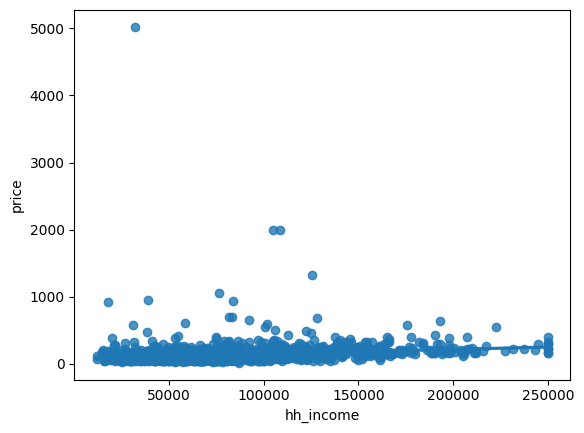

In [21]:
import seaborn as sns
sns.regplot(x='hh_income', y='price', data=ct_demo_g_count)

### 4.2 Relationship between the Price and Housing Value (2 points)
*house_value* column contains the median housing value by each census tract. Use the median listing price as the y axis and the housing value as the x axis to draw scatter plot below.

<AxesSubplot: xlabel='house_value', ylabel='price'>

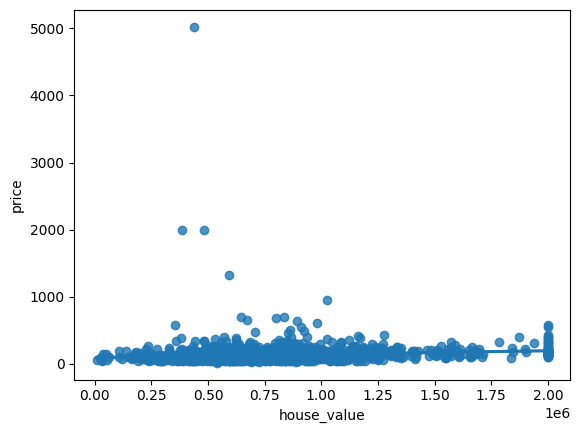

In [22]:
sns.regplot(x='house_value', y='price', data=ct_demo_g_count)

### 4.3 Mapping the Listing and Census Tracts (8 points)
Plot all the listing and census tracts on the same figure. 
- Change the title to *2022 New York City Airbnb Listing* and name the x-y axis as longitude and latitude. (2 points)

Out of aesthetic purpose, 
- Change the transparency of census tracts and listing points to 0.2. (2 points) 
- Change the size of listing points to 0.4. (2 points)
- Add *grey* edge color to census tracts. (2 points)

Show your map below.

<AxesSubplot: title={'center': '2022 New York City Airbnb Listing'}, xlabel='Longitude', ylabel='Latitude'>

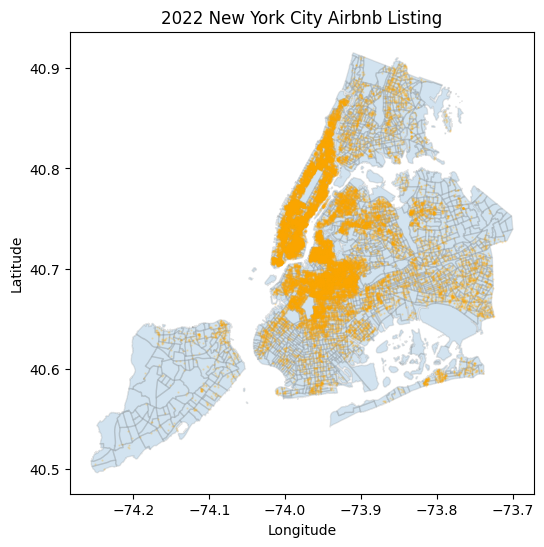

In [23]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb Listing')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g.plot(ax=ax,    
               alpha=0.2,
               edgecolor="grey")
listing.plot(ax=ax, 
             alpha=0.2,
             color='orange',
             markersize=0.4)

### 4.4 Choropleth Map on the Number of Listing (8 points)
Plot the number of listing by census tracts. 
- Change the title to *2022 New York City Airbnb: the Number of Listing by Census Tract* and name the x-y axis as longitude and latitude. (2 points)
- Use *quantile* as the scheme and specify the quantile number as 5. Use color set *OrRd*. (2 points)

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract. (2 points) 
- Add *grey* edge color to census tracts and specify the edge width as 0.2. (2 points)

<AxesSubplot: title={'center': '2022 New York City Airbnb: the Number of Listing by Census Tract'}, xlabel='Longitude', ylabel='Latitude'>

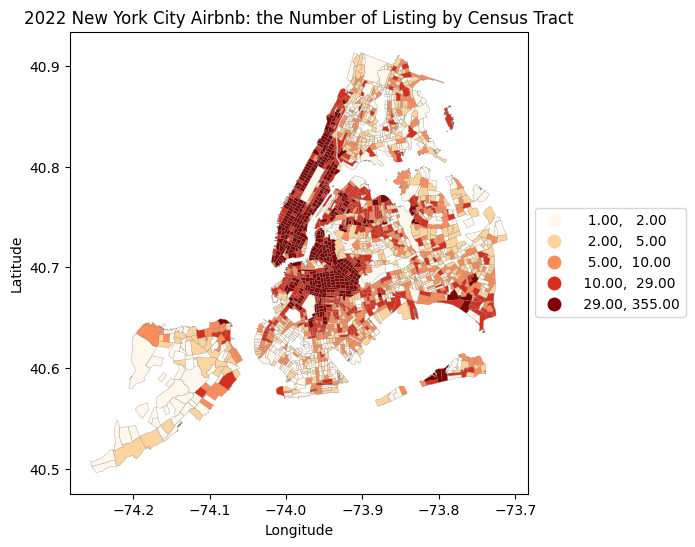

In [24]:
import mapclassify
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb: the Number of Listing by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g_count.plot(ax=ax,  
                     column='listing_no',
                     scheme='quantiles', k=5, cmap='OrRd',
                     edgecolor="grey", linewidth=0.2,
                     legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

### 4.4 Choropleth Map on the Median Housing Value (2 points)
Plot the median housing value by census tracts. 
- Change the title to *2022 New York City Airbnb: the Median Housing Value by Census Tract* and name the x-y axis as longitude and latitude.
- Use *quantile* as the scheme and specify the quantile number as 5. Use color set *OrRd*.

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract.
- Add *grey* edge color to census tracts and specify the edge width as 0.2.

<AxesSubplot: title={'center': '2022 New York City Airbnb: the Median Housing Value by Census Tract'}, xlabel='Longitude', ylabel='Latitude'>

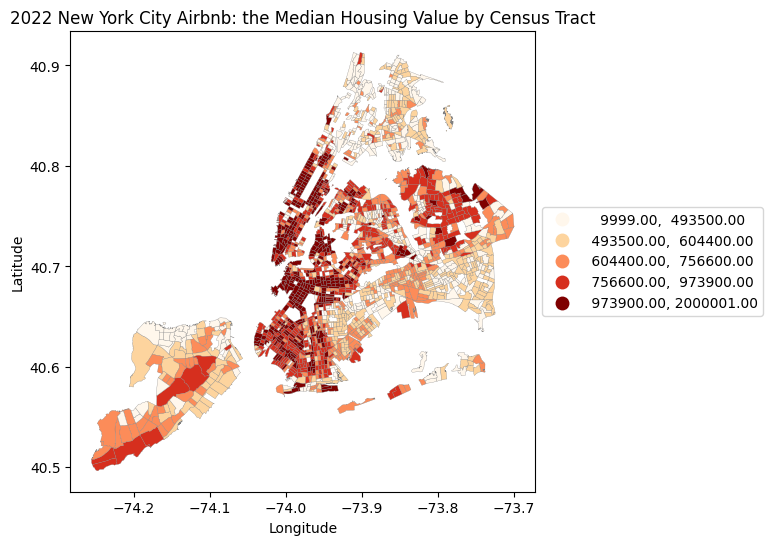

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb: the Median Housing Value by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g_count.plot(ax=ax,  
                     column='house_value',
                     scheme='quantiles', k=5, cmap='OrRd',
                     edgecolor="grey", linewidth=0.2,
                     legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})

### 4.4 Choropleth Map on the Median Household Income (2 points)
Plot the median household income by census tracts.
- Change the title to *2022 New York City Airbnb: the Median Household Income by Census Tract* and name the x-y axis as longitude and latitude.
- Use quantile as the scheme and specify the quantile number as 5. Use color set *BuPu*.

For aesthetic purpose,
- Add legend to the map and do not let it overlap with any census tract.
- Add grey edge color to census tracts and specify the edge width as 0.2.

<AxesSubplot: title={'center': '2022 New York City Airbnb: the Median Household Income by Census Tract'}, xlabel='Longitude', ylabel='Latitude'>

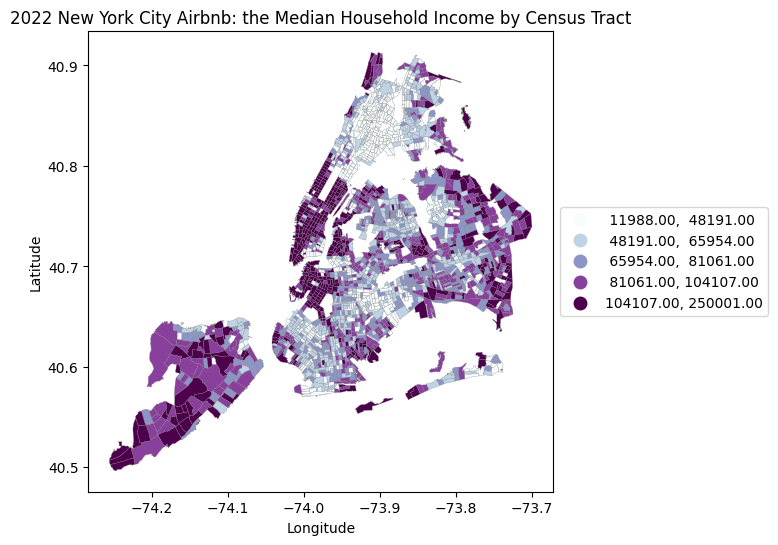

In [26]:
fig, ax = plt.subplots(figsize=(6, 6))
plt.title('2022 New York City Airbnb: the Median Household Income by Census Tract')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

ct_demo_g_count.plot(ax=ax,  
                     column='hh_income',
                     scheme='quantiles', k=5, cmap='BuPu',
                     edgecolor="grey", linewidth=0.2,
                     legend=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5)})